In [1]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [1]:
import json
import matplotlib.pyplot as plt
import wandb

In [2]:
wandb.init(project="deformable-detr-lab")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: qndt123 (qninhdt). Use `wandb login --relogin` to force relogin


In [4]:
logs = []

with open('./logs.txt', 'r') as f:
    log_texts = f.readlines()

for log_text in log_texts:
    log = json.loads(log_text)
    logs.append(log)
    wandb.log({
        'train_loss': log['train_loss'],
        'test_loss': log['test_loss'],
    })

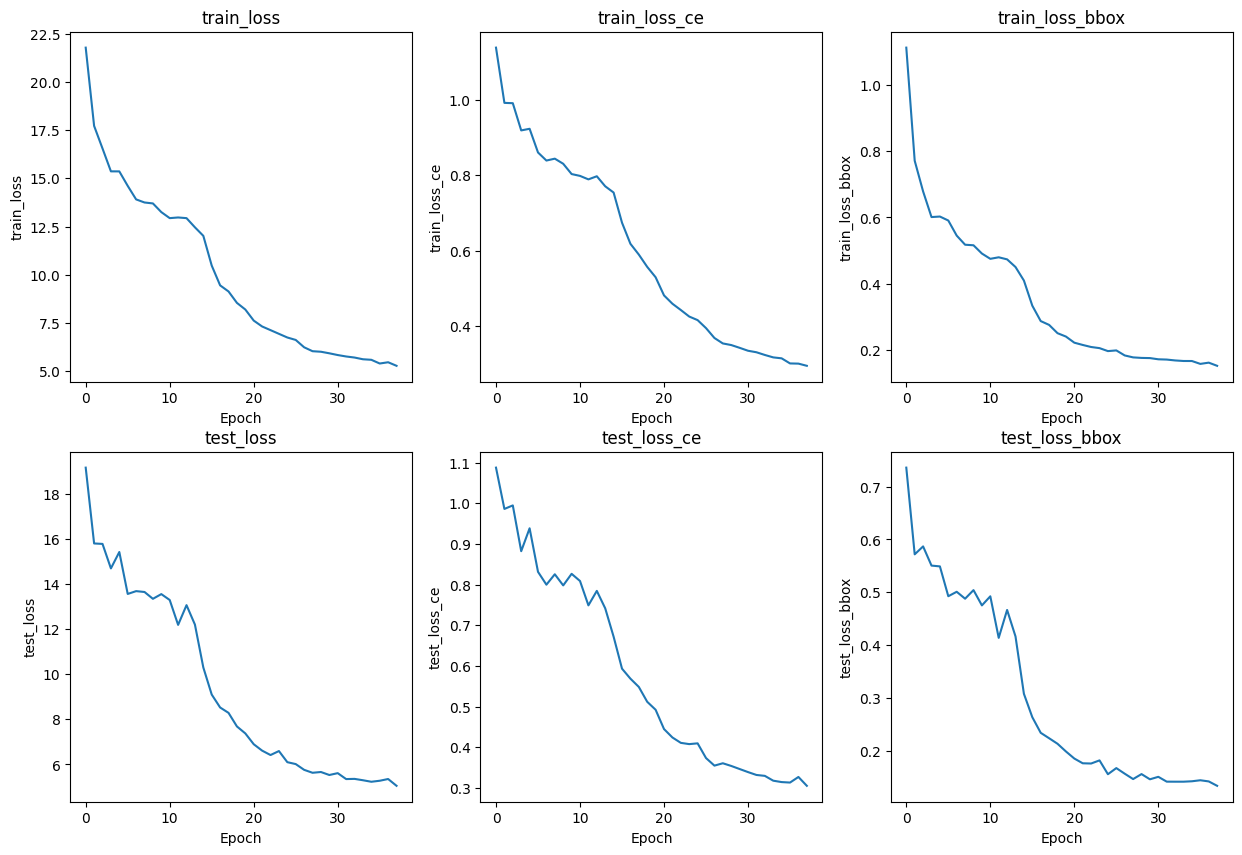

In [5]:
metrics = [
  'train_loss',
  'train_loss_ce',
  'train_loss_bbox',
  'test_loss',
  'test_loss_ce',
  'test_loss_bbox'
]

# Plot the metrics in grids 2 x 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, metric in enumerate(metrics):
    axs[i//3, i%3].plot([log[metric] for log in logs])
    axs[i//3, i%3].set_title(metric)
    axs[i//3, i%3].set_xlabel('Epoch')
    axs[i//3, i%3].set_ylabel(metric)

plt.show()

In [6]:
with open('metrics.txt', 'r') as f:
  lines = f.read().splitlines()
  metrics = {}

  for line in lines:
    if line == '':
      wandb.log(metrics)
      # print(metrics)
      metrics = {}
    else: 
      title = line[8:18].strip() + " (" + line[31:40].strip() + "|" + line[49:55].strip() + ")"
      metrics[title] = float(line[-5:])


In [7]:
# import json

# ROOT = './data/coco'

# def gen_labels(mode):
#     with open(ROOT + '/annotations/instances_{}.json'.format(mode), 'r') as f:
#         annotation = json.load(f)


#     with open(ROOT + '/{}.txt'.format(mode), 'w') as f:
#       for image in annotation['images']:
#         f.write('./images/{}/{}\n'.format(mode, image['file_name']))

#     # make dir labels if not exist
#     import os
#     if not os.path.exists(ROOT + '/labels'):
#       os.makedirs(ROOT + '/labels')

#     if not os.path.exists(ROOT + '/labels/{}'.format(mode)):
#       os.makedirs(ROOT + '/labels/{}'.format(mode))

#     objects = {}
#     for obj in annotation['annotations']:
#       if obj['image_id'] not in objects.keys():
#         objects[obj['image_id']] = []
#       objects[obj['image_id']].append(obj)

#     for image in annotation['images']: 
#       with open(ROOT + '/labels/{}/{}.txt'.format(mode, image['file_name']), 'w') as f:
#         if image['id'] not in objects.keys():
#           continue

#         for obj in objects[image['id']]:
#           f.write('{} {} {} {} {}\n'.format(obj['category_id'], obj['bbox'][0]/640, obj['bbox'][1]/640, obj['bbox'][2]/640, obj['bbox'][3]/640))

# gen_labels('train2017')
# gen_labels('val2017')
